La teoria del muestreo es un campo fundamental de la estadistica que se ocupa de los metodos para seleccionar muestras representativas de una poblacion mas grande y de los principios para inferir las caracteristicas de la poblacion a partir de esas muestras. Esta teoria proporciona las bases metodolgicas y matematicas para el disenio de encuestas y experimentos, asegurando que las conclusiones y precciones hechas a partir de las muestras sean validas y confiables.

Generadores de numeros aleatorios (RNG) y tests de aleatoriedad

In [1]:
import numpy as np
from scipy.stats import kstest

# Generar números aleatorios
random_numbers = np.random.random(100)  # 100 números aleatorios uniformemente distribuidos entre 0 y 1

# Test de Kolmogorov-Smirnov para comprobar si la distribución es uniforme
ks_statistic, p_value = kstest(random_numbers, 'uniform')
print(f"KS Statistic: {ks_statistic}, P-Value: {p_value}")

KS Statistic: 0.07243041525172267, P-Value: 0.6436338581439205


Generacion de muestras con distribucion exponencial y Poisson

In [2]:
# Generar muestras con distribución exponencial
exponential_samples = np.random.exponential(scale=1.0, size=1000)  # scale es el inverso de la tasa (lambda)

# Generar muestras con distribución de Poisson
poisson_samples = np.random.poisson(lam=3.0, size=1000)  # lam es el promedio de eventos en un intervalo fijo

Generacion de muestras con distribucion normal

In [3]:
# Generar muestras con distribución normal
normal_samples = np.random.normal(loc=0.0, scale=1.0, size=1000)  # loc es la media, scale es la desviación estándar

Muestreo por Rechazo

El muestreo por rechazo es un metodo para generar observaciones a partir de una distribucion de probabildiad p(x) utilizando una distribucion de muestreo mas simple q(x), de la cual es facil generar muestras. Este metodo se basa en la idea de generar propuestas de q(x) y luego aceptar o rechazar cada propuesta basandose en ciertos criterios.

Proceso basico del muestreo por rechazo:

1- Encontrar una distribucion de propuestas: Seleccionar una distribucion de propuestas q(x) tal que q(x) > 0 siemore que p(x) > 0, y existe una constante M donde Mq(x) >= p(x) para todo x.

2- Muestreo y Rechazo:
- Generar una muestra x de la distribucion de propuestas q(x).
- Generar una muestra u de una distribucion uniforme U[0, 1].
- Aceptar x si u <= p(x) / Mq(x); de lo contrario, rechazar x y repetir el proceso.

Ventajas:

- Sencillo de implementar
- No rquiere conocimiento del valor de normalizacion de p(x).

Desventajas:

- Puede ser ineficiente si M es mucho mayor que 1 o si la forma de q(x) no se ajusta bien a p(x), ya que muchas muestras pueden ser rechazadas.


Muestreo por rechazo adaptativo

El muestreo por rechazo adaptativo es una extension del muestreo por rechazo que ajusta dinamicamente la distribucion de propuestas q(x) para mejorar la eficiencia del muestreo, es decir, reducir el numero de rechazps y hacer que q(x) se asemeje mas estrechamente a p(x).

Proceso basico del muestreo por rechazo adaptativo:

1- Inicio:

- Comenzar con una distribucion de propuestas inicial q0(x).

2- Adaptacion:
- Basado en las muestras aceptadas y recahazadas, ajustar los parametros de q(x) para que se asemeje mas a p(x).
- Esto puede hacerse incrementando la complejidad de q(x) o ajustando sus parametros para cubir mejor las areans donde las muestras tienden a ser rechazadas.

3- Iteracion:
- Repetir el proceso de muestreo y adaptacion hasta que q(x) sea lo suficientemente eficiente en terminos de la tasa de aceptacion o se cumplan otros criterios de convergencia.

Ventajas:

- Mayor eficiencia comparado con el muestreo por rechazo no adaptativo.
- Puede manejar distribuciones complejas y multi-modales mas efectivamente.

Desventajas:
- Mas complejo de implementar
- Requiere cuidado para asegurar que el proceso de adaptacion no viole los principios de muestreo probabilistico, como la convergencia a la distribucion deseada.


Muestreo por rechazo explicacion sencilla:

Lo que se busca es hacer una receta copiando a un chef, pero sin la receta exacta. Sabemos que necesitamos ciertos ingredientes y los conseguimos (las muestras), pero no sabemos las cantidades precisas. Asi que se prueba al azar, algunas veces se echa mucho de uno y otras veces muy poco.

El muestreo por rechazo es como si se hicieran pequenias pruebas de sabor (muestras aleatorias), comparandolas cada vez con el sabor que se espera (la distribucion objetivo). Cuando se prueba algo que sabe muy diferente a lo que se busca se rechaza. Pero si se encuentra algo que sabe casi igual, se guarda (acepta la muestra).

En el grafico se ven los "sabores" que se deciden guardar. El hecho que el histrograma se parezca a la curva significa que las pruebas al azar terminan dando una buena coleccion de sabores que se parecen mucho a lo que se queria imitar. Es una manera de copiar la "receta" sin saber las cantidades exactas, solo probando y eligiendo lo que se siente correcto.

Ejemplo de Muestreo por rechazo

Imaginemos que queremos muestrear de una distribucion de probabilidad objetivo p(x) que es proporcional a exp(-x^2/2 + sin(5x)) en el intervalo [-3, 3], pero no tenemos una forma facil de muestrar directamente de ella.

Usaremos una distribucion normal estandara N(0, 1) como nuestra distribucion de propuestas q(x).

 Eficiencia del sampleo (muestras aceptadas / total muestreado) : 0.4488330341113106
Media: 0.005614074354606892
Mediana: 0.15656365847006207
Varianza: 0.985843387578216
Desviación Estándar: 0.9928964636749473
Mínimo: -3.4727493215647383
Máximo: 3.0723596349802382


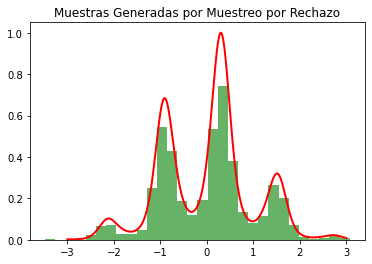

C:\Users\Facu\AppData\Local\Temp\ipykernel_23260\2208289725.py:65: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(samples_array, shade=True)


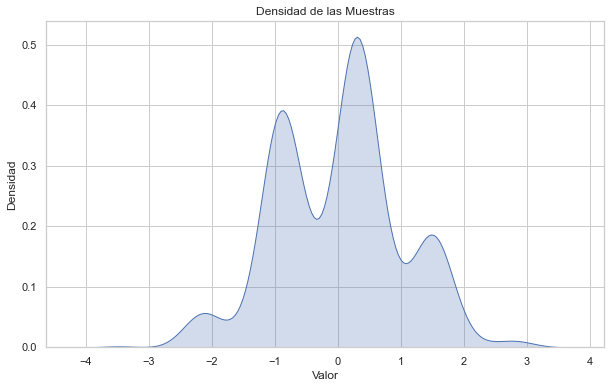

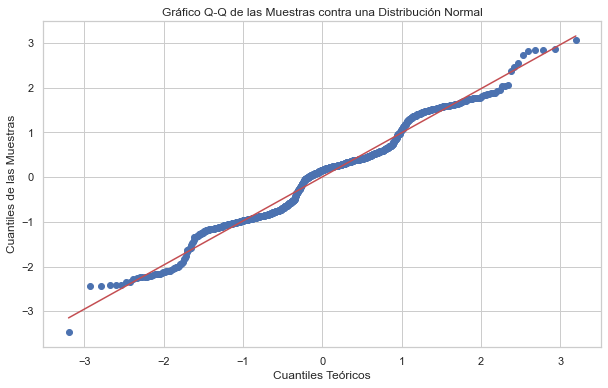

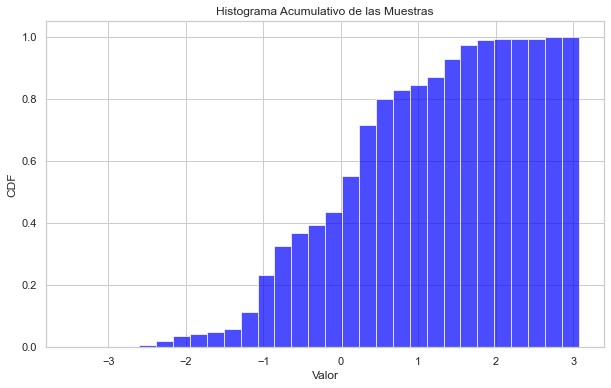

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#Generar una muestra x de la distribucion de propuestas q(x).
#Generar una muestra u de una distribucion uniforme U[0, 1].
#Aceptar x si u <= p(x) / Mq(x); de lo contrario, rechazar x y repetir el proceso.

def target_distribution(x):
    return np.exp(-x**2 / 2 + np.sin(5 * x))

def proposal_distribution(x, std):
    return np.exp(-x**2 / (2 * std**2)) / (np.sqrt(2 * np.pi) * std)

# Encuentra un M adecuado usando un número grande de muestras
x_vals = np.linspace(-3, 3, 1000000)
M = max(target_distribution(x_vals) / proposal_distribution(x_vals, 1))


# Muestreo por rechazo
samples = []
not_accepted_samples = []
while len(samples) < 1000:
    x_proposal = np.random.normal(0, 1)
    u = np.random.uniform(0, 1)
    if u <= target_distribution(x_proposal) / (M * proposal_distribution(x_proposal, 1)):
        samples.append(x_proposal)
    else:
        not_accepted_samples.append(x_proposal)


sampling_efficiency = len(samples) / (len(samples) + len(not_accepted_samples))

samples_array = np.array(samples)

mean = np.mean(samples_array)
median = np.median(samples_array)
variance = np.var(samples_array)
std_deviation = np.std(samples_array)
minimum = np.min(samples_array)
maximum = np.max(samples_array)


print(f' Eficiencia del sampleo (muestras aceptadas / total muestreado) : {sampling_efficiency}')
print(f"Media: {mean}")
print(f"Mediana: {median}")
print(f"Varianza: {variance}")
print(f"Desviación Estándar: {std_deviation}")
print(f"Mínimo: {minimum}")
print(f"Máximo: {maximum}")

# Visualizar las muestras
plt.hist(samples, bins=30, density=True, alpha=0.6, color='g')
x_vals = np.linspace(-3, 3, 1000000)
plt.plot(x_vals, target_distribution(x_vals) / max(target_distribution(x_vals)), 'r-', lw=2)
plt.title('Muestras Generadas por Muestreo por Rechazo')
plt.show()

# Configurar el estilo de Seaborn para las gráficas
sns.set(style="whitegrid")

# Gráfico de densidad
plt.figure(figsize=(10, 6))
sns.kdeplot(samples_array, shade=True)
plt.title('Densidad de las Muestras')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.show()

# Gráfico Q-Q
plt.figure(figsize=(10, 6))
stats.probplot(samples_array, dist="norm", plot=plt)
plt.title('Gráfico Q-Q de las Muestras contra una Distribución Normal')
plt.xlabel('Cuantiles Teóricos')
plt.ylabel('Cuantiles de las Muestras')
plt.show()

# Histograma acumulativo
plt.figure(figsize=(10, 6))
plt.hist(samples_array, bins=30, cumulative=True, color='blue', alpha=0.7, density=True)
plt.title('Histograma Acumulativo de las Muestras')
plt.xlabel('Valor')
plt.ylabel('CDF')
plt.show()


Conclusion del Muestreo por rechazo

El grafico 1 muestra el histograma de las muestras obtenidas por el muestreo por rechazo, superpuesto con la curva de la distribcuion objetivo normalizada (en rojo).

1- Cobertura de la distribucion objetivo: El histograma de las muestras parece seguir la forma general de la distribucion objetivo, lo que indica que el muestreo por rechazo ha capturado con exito las caracteristicas principales de la distribucion.

2- Picos y valles: Hay picos claros en el histograma que corresponden a los picos de la distribucion objetibo. Esto suguiere que el algoritmo esta seleccionando adecuadamente muestras en las areas de alta probabilidad de la distribucion objetivo.

3- Densidad de las muestras: La densidad relativa de las muestras en diferentes regiones parece ser proporcional a la densidad de la distribucion objetivo, lo cual es exactamente lo que esperarias de un buen muestreo por rechazo.

Grafico 2:

- el grafico KDE ayudara a ver la forma "suavizada" de la distrubicion de las muestras

Grafico 3:

- El grafico Q - Q es util para ver si las muestras se distribuyen como una distribucion normal, que es una suposicion comun en muchos modelos estadisticos.

Grafico 4:

- El histograma acumulativo permite entender rapidamente que proporcion de las muestras cae por debajo de un determinado valor.

Estadisticas

- Media: promedio de las muestras

- Mediana: valor central de las muestras cuando se ordenan

- Varianza: mide la dispersion de las muestras respecto a la media

- Desviacion estandar: es la raiz cuadrada de la varianza y proporciona una medida de la dispersion en las mismas unidades que las muestras

- Maximo y minimo: son los valores mas altos y mas bajos de las muestras

Aplicaciones en IA:

1- Aprendizaje automatico: En machine learning, a menudo se necesita generar muestras de una distribucion para entender tus modelos. Si esa distribucion es complicada o no se conoce de forma analitica, el muestreo por rechazo puede ser una tecnica util.

2- Modelos graficos probabilisticos: En modelos graficos, como las redes bayesianas, a veces se quiere inferir la distribucion de ciertas variables, y el muestreo por rechazo permite aproximar a estas distribuciones cuando no puedes calcularas directamente.

3- Monte Carlo y simulaciones: Las tecnicas de Monte Carlo, que son comunes en IA para estimar distribuciones y hacer inferencias, a menudo emplean muestreo por rechazo para generar simulaciones necesarias.

4- Optimizacion

5- Sintesis de datos


Ejemplo de muestreo por rechazo adaptativo: Para el muestreo por rechazo adaptativo, ajustaremos dinamicamente la desviacion estandar de la distribucion normal de propuestas para mejorar la tasa de aceptacion.

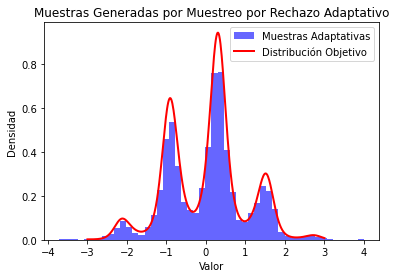

In [18]:
def adaptive_rejection_sampling(iterations, initial_std=1):
    samples = []
    std = initial_std
    x_vals = np.linspace(-3, 3, 10000)
    M = max(target_distribution(x_vals) / proposal_distribution(x_vals, std))  # Usar std inicial para encontrar M
    
    for i in range(iterations):
        x_proposal = np.random.normal(0, std)
        u = np.random.uniform(0, M * proposal_distribution(x_proposal, std))
        if u <= target_distribution(x_proposal):
            samples.append(x_proposal)
            # Adaptar la desviación estándar basado en muestras aceptadas
            std = np.std(samples) if len(samples) > 1 else std
        else:
            # Ajustar la desviación estándar si la tasa de aceptación es baja
            std = std * 1.1 if len(samples) / (i + 1) < 0.2 else std
            
    return samples, M

# Muestreo por rechazo adaptativo
samples_adaptive, M = adaptive_rejection_sampling(10000, initial_std=1)

# Visualización de las muestras y la distribución objetivo
plt.hist(samples_adaptive, bins=50, density=True, alpha=0.6, color='b', label='Muestras Adaptativas')
x_vals = np.linspace(-3, 3, 400)
pdf_vals = target_distribution(x_vals) / (M * max(proposal_distribution(x_vals, np.std(samples_adaptive))))
plt.plot(x_vals, pdf_vals, 'r-', lw=2, label='Distribución Objetivo')
plt.title('Muestras Generadas por Muestreo por Rechazo Adaptativo')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.legend()
plt.show()



Muestreo de importancia y el remuestreo del muestreo

Importance sampling es una tecnica de estimacion de Monte Carlo que se usa ampliamente para calcular integrales, especialmente en situaciones donde las funciones involucradas son dificil de integrar usando metodos analiticos o numericos estandar.

El objetivo de Importance Samplir es calcular la integral de una funcion f(x) con respecto a una distribucion de probabilidad p(x), es decir, calcular la expectativa Ep[f(X)]:

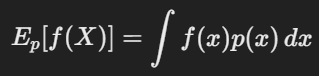

Sin embargo, directamente esta integral puede ser dificil de estimar si p(x) hace que sea dificil muestrar en las regiones donde f(x) es significativamente diferente de cero. Aqui es donde entra en juego el Importance Sampling:

1- Eleccion de una distribucion de importancia q(x): Se selecciona una distribucion alternativa q(x) desde la cual es facil generar muestras y que, idealmente, tiene una forma similar a f(x)p(x). Esto asegura que mas muestras se generen en las regiones importnatnes para la integral.

2- Transformacion de la integral: La integrla original se transforma utilizando la distribucion q(x) de la siguiente manera:

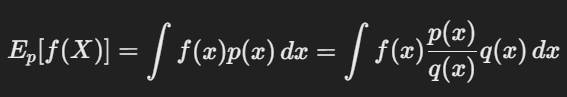

3- Estimacion Monte Carlo: Se genera un conjunto de muestras {x1, x2, .... , xN} de la distribucion q(x). La integral se estima luego como el promedio ponderado de f(xi) con los pesos p(xi)/q(xi).

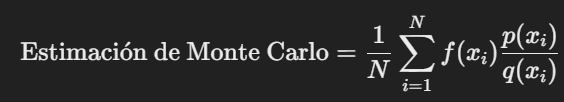

Remuestreo del muestreo de importancia

El remuestreo es una tecnica utilizada en combinacion con el muestreo de importancia para abordar el problema de la degeneracion de los pesos, donde algunos pesos pueden ser muy grandes en comparacion con otros, lo que lleva a una ineficiencia en la estimacion. El remuestreo consiste en generar una nueva muesta (remuesta) de las muestras originales de acuerdo con sus pesos, de tal manera que las muestras con mayores pesos son mas propensas a ser seleccionadas. El resultado es un conjunto de muestras remuestreadas que tienen una distribucion mas uniforme de pesos.

Proceso de remuestreo:

1- Normalizacion de pesos: Los pesos w(x) se normalizan de modo que su suma sea igual 1. Esto convierte los pesos en una distribucion de probabildiad sobre las muestras.

2- Seleccion de muestras: Se seleccionan muestras de la distribucion original con reemplazo donde la probabilidad de seleccionar cada muestra es proporcional a su peso normalizado.

3- Nueva muestra igualmente ponderada: El conjunto de muestras remuestradas tienen pesos iguales y puede usarse para estimaciones adicionales o para procedimientos de inferencia estadistica.

Explicacion de manera sencilla:

Imaginar que estamos en una pasteleria y tu tarea es averiguar cuando chocolate se usa en promedio en todos los pasteles de la tienda. Pero no todos los pasteles tienen la misma cantidad de chocolate, y algunos tipos de pasteles son mas comunes que otros.

1- Elegir los pasteles (muestras): En vez de probar todos los pasteles uno por uno, se decide que solo se probaran algunos al azar (esto es tomar muestras). Para hacerlo mas inteligente, se escoge mas de los pasteles que son mas comunes (esta es la distribucion de importancia, que sabes que tiene mas chocoalate en promedio).

2- Pesar el chocolate (evaluacion de la funcion): Cada vez que pruebas un pastel, pesas la cantidad de chocolate (esto es evaluar la funcion f(x) que se quiere integrar).

3- Justo y equitativo (calculo de pesos): Pero como se escogio mas de ciertos pasteles  que de otros, se debe ajustar los calculos para que sea justo. Asi que a cada peso le das un "peso" basado en que tan comunes son esos pasteles (p(x) / q(x)).

4- Hacer el promedio (estimacion de la integral): Ahora, tomas todos los pesos de chocolate y calcular el promedio, pero teniendo en cuenta los pesos que asignaste (esto es calcular la integral). Esto te da una buena idea de cuanto chocolate hay en un pastel promedio en toda la tienda.

Ejemplo de muestreo de importancia. Supongamos que deseamos estimar la media de una distribuion objetivo que es dificil de muestrear directamente. Usaremos una distribucion normal como nuestra distribucion de importancia.

Integral de f(x)*p(x) con IS con q(x): 0.4242274829814781
Integral original f(x)*p(x) = 0.42369885082106756


c:\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


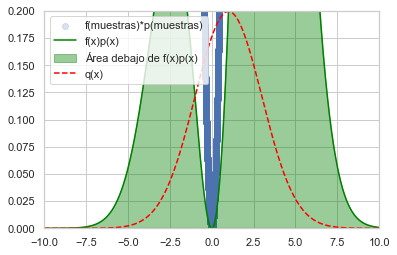

In [39]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt


# Definir la distribución objetivo p(x) y la distribución de importancia q(x)
def target_distribution(x, mu, sigma):
    return norm.pdf(x, mu, sigma)

def importance_distribution(x, muQ, sigmaQ):
    return norm.pdf(x, muQ, sigmaQ)

f = lambda x: x**2

# Generar N muestras de la distribución de importancia
mu = 1
sigma = 2
muQ = 1
sigmaQ = 2
N = 100000

samples = np.random.normal(muQ, sigmaQ, N)
samples_p = np.random.normal(mu, sigma, N)

# Definir un rango más amplio de t si es necesario
t = np.linspace(-10, 10, 10000) # Rango ampliado y más puntos para una curva más suave

p = target_distribution(samples, mu, sigma)
q = importance_distribution(samples, muQ, sigmaQ)
p_p = target_distribution(samples_p, mu, sigma)

# Cálculo de la integral con montecarlo
weights = p / q
# Normalizar los pesos para evitar que los outliers dominen la gráfica de dispersión
#weights /= np.max(weights)

integral = np.mean(f(samples) * weights * q)
print("Integral de f(x)*p(x) con IS con q(x):", integral)

integral_original = np.mean(f(samples_p) * p_p)
print(f'Integral original f(x)*p(x) = {integral_original}')

plt.scatter(samples, f(samples) * weights, alpha=0.2, label='f(muestras)*p(muestras)')
plt.plot(t, target_distribution(t, mu, sigma) * f(t), color='green', label='f(x)p(x)')
plt.fill_between(t, 0, target_distribution(t, mu, sigma) * f(t), color='green', alpha=0.4, label='Área debajo de f(x)p(x)')
plt.plot(t, importance_distribution(t, muQ, sigmaQ), color='red', linestyle='--', label='q(x)') # Línea punteada para diferenciar
plt.xlim(-10, 10) # Límites para el eje x
plt.ylim(0, 0.2) # Límites para el eje y, ajustar según sea necesario
plt.legend()
plt.show()


# Calcular la estimación ponderada de la media
#estimated_mean = np.sum(weights * samples)

#print("Estimación ponderada de la media:", estimated_mean)

# Remuestreo
#resampled_indices = np.random.choice(np.arange(N), size=N, replace=True, p=weights)
#resampled_samples = samples[resampled_indices]

#Calcular la media de las muestras remuestreadas
#remuestreo_mean = np.mean(resampled_samples)

#print("Media de las muestras remuestreadas:", remuestreo_mean)


El codigo proporcionado implementa el metodo de importance sampling para calcular una integrla especifica utilziando tecnicas de simulacion Monte Carlo.

1- Definicion de Funciones y Distribuciones

*Distribuciones Objetivo y de Importancia:*
- target_distribution(x, mu, sigma): Define la funcion de densidad de probabilidad (PDF) de la distribucion normal objetivo, p(x), con media mu y desviacion estandar sigma. Esta es la distribucion con respecto a la cual se desea calcular la integral de f(x).
- importance_distribution(x, muQ, sigmaQ): Define la PDF de la distribucion de importancia, q(x), que es otra distribucion normal con su propia media muQ y desviacion estandar sigmaQ. Esta distribuion se utiliza para generar muestras de manera eficiente, especialmente en las regiones donde f(x)p(x) es significativo.

2- Funcion a integrar

- f = lambda x: x**2: Define la funcion f(x) = x^2, cuya expectativa ponderada por p(x) se quiere calcular. En terminos de probabildiad y estadisitica, estas calculando el segundo momento (o varianza) de la distribucion, si mu es cero.

3- Generacion de Muestras de la distribucion de importancia

- Samples = np.random.normal(muQ, sigmaQ, N): Genera N muestras de la distibucion de importancia q(x). Estas muestras se utilizan para estimar la integral f(x)p(x) mediante un promedio ponderado.

4- Evaluacion de las funciones de densidad en las muestras

- p = target_distribution(samples, mu, sigma): Evalua la PDF objetivo p(x) en cada muestra generada.
- q = importance_distribution(samples, muQ, sigmaQ): Evalua la PDF de importancia q(x) en cada muestra generada.

5- Calculo de pesos y estimacion de la integral

- weight = p / q: calcula los pesos wi = p(xi)/q(xi) para cada muestra, que ajustan las diferencias en la probabilidad de que las muestras ocurran bajo las dos distribuciones.
- integral = np.mean(f(samples)*weight): Calcula la estimacion de la integral de f(x)p(x) como el promedio ponderado de f(xi) con los pesos calculados. Este es el paso clave donde se aplica importance sampling para estimar la integral.


Resultados del grafico

- Curva verde solida: Representa la funcion f(x)p(x). Esta es la curva de la funcion objetivo ponderada por la densidad de probabildiad de la distribucion objetivo.
- Area verde rellena: Muestra el area bajo la curva de f(x)p(x), que es la integral que estamos tratando de estimar. La visualizacion del area ayuda a comprender el tamanio relativo de la integral con respecto a la escala del grafico.
- Linea roja punteada: Indica la distribucion de importancia q(x). Esta es la distribucion desde la cual se esta muestreando. La proximidad entre la linea roja punteada y la curva verde sugiere que q(x) esta razonablemente bien alineada con f(x)p(x), lo cual es deseable en el muestreo de importancia.
- Puntos azules dispersos: Corresponden a las muestras generads desde q(x) y ponderadas por la funcion f(x)p(x).

Metropolis-Hastings

El algoritmo de Metropolis-Hasings permite muestrear de una distribucion objetivo p(x) a partir de una propuesta de distribucion q(x'|x), que puede depender del estado actual x. Es un metodo mas general que el original de Metropolis y permite que las distribuciones de propuestas seasn asimetricas.

1- Inicio: Comenzar en un punto inicial x0 y elegir una distribucion de propuestas q(x'|x).
2- Iteracion:

- Desde el estado actual x, generar un nuevo estado propuesto x' muestreando de q(x'|x)

- Calcular la razon de aceptacion alpha, que es el minimo entre 1 y la razon de las densidades de la distribucion objetivo y las distribuciones propuestas:

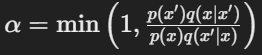

- Generar un numero uniformemente distribuido u entre 0 y 1.

- Si u <= alpha, aceptar el estado propuesto y moverse a x'; de lo contrario, permanecer en x.

3- Repeticion: Repetir el paso de iteracion muchas veces para generar una cadena de muestras.

Estimación de la media: 0.02327865722350242
Estimación de la mediana: 0.18714014910863583
Estimación de la desviación estándar: 0.9918176737053802
Intervalo de credibilidad del 95%: [-2.07225389  1.75119305]


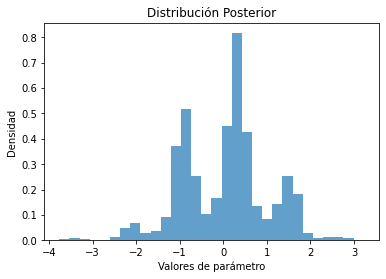

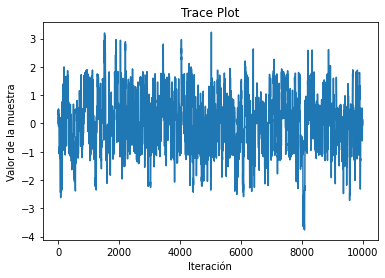

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def metropolis_hastings(target_distribution, proposal_distribution, num_samples, initial_state):
    samples = [initial_state]
    current_state = initial_state
    
    for _ in range(num_samples):
        # Generar un nuevo estado propuesto
        proposed_state = proposal_distribution(current_state)
        
        # Calcular la razón de aceptación
        acceptance_ratio = min(1, target_distribution(proposed_state) / target_distribution(current_state))
        
        # Decidir si se acepta el nuevo estado
        if np.random.rand() < acceptance_ratio:
            current_state = proposed_state
        
        samples.append(current_state)
    
    return np.array(samples)

# Ejemplo de uso
# Definir la distribución objetivo (sin normalizar)
def target_distribution(x):
    return np.exp(-x**2 / 2 + np.sin(5 * x))

# Definir la distribución de propuesta (una distribución normal)
def proposal_distribution(x):
    return np.random.normal(x, 0.5)  # Puedes ajustar la desviación estándar según sea necesario

# Parámetros del algoritmo
num_samples = 10000
initial_state = 0

# Obtener muestras usando Metropolis-Hastings
samples = metropolis_hastings(target_distribution, proposal_distribution, num_samples, initial_state)

mean_estimate = np.mean(samples)
median_estimate = np.median(samples)
std_deviation = np.std(samples)
cred_interval = np.percentile(samples, [2.5, 97.5])



print("Estimación de la media:", mean_estimate)
print("Estimación de la mediana:", median_estimate)
print("Estimación de la desviación estándar:", std_deviation)
print("Intervalo de credibilidad del 95%:", cred_interval)

plt.hist(samples, bins=30, density=True, alpha=0.7)
plt.title('Distribución Posterior')
plt.xlabel('Valores de parámetro')
plt.ylabel('Densidad')
plt.show()

plt.plot(samples)
plt.title('Trace Plot')
plt.xlabel('Iteración')
plt.ylabel('Valor de la muestra')
plt.show()

Los resultados obtenidos proporcionan una vision estadistica de las caracteristicas de la distribucion de la que se han muestreado los datos.

Estimación de la media: 0.02327865722350242

- La media de la muestras es muy cercana a cero, lo que siguiere que el centro de la distribucion de la que se han muestreado los datos esa cerca de cero. La media es una medida de tendencia central y ofrece una idea del valor medio que se puede esperar de la distribucion.

Estimación de la mediana: 0.18714014910863583

- La mediana es otro indicador de la tendencia central, es el valor que divide las muestras en dos mitades iguales. A diferencia de la media, la mediana es menor sensible a valores atipicos y desviaciones extremas. El hecho de que la mediana sea positiva y mayor que la media podria indicar una asimetria en la distribucion o la presencia de valores atipicos que estan desplazando la media hacia un valor mas bajo.

Estimación de la desviación estándar: 0.9918176737053802

- La desviacion estandar es una medida de la dispersion o variabilidad de las muestras alrededor de la media. Un valor cercano a uno sugiere que la mayoria de las muestras caen dentro de un rango de un estandar de desviacion alrededor de la media, lo que es caracteristico de una distribucion normal estandar, pero tambien es comun en muchas otras distribuciones.


Muestreo de Gibbs

El muestreo de Gibbs es una tecnica de muestreo utilizada en estadisticas para generar secuencias de muestras a partir de distribuciones de probabilidad multivariantes. Es especialmente util cuando la forma completa de la distribucion conjunta es complicada o desconocida, pero las distribuciones condicionales son mas faciles de manejar.

Descripcion general de como funciona el muestreo de Gibbs:

1- Inicilaizacion: Se comienza eligiendo un punto inicial para cada una de las variables en el conjunto

2- Iteracion sobre variables: En cada paso del algoritmo, se selecciona una variable y se actualiza su valor muestreando de su distribucion condicional, manteniendo fijos los valores actuales de todas las otras variables. Este proceso se repite, ciclando a traves de todas las variables del modelo.

3- Convergencia: Se repite el paso 2 hasta que el proceso converga o hasta que se alcanze un numero predefinido de iteraciones. La convergencia generalmente significa que las muestras generadas representan adecuadamente la distribucion conjunta objetivo. 

4- Uso de las muestras: Las muestras generadas pueden ser utilizadas para estimaciones estadisitcas como la media, la mediana, los intervalos de confianza, etc.

El muestreo de Gibbs es un caso especial del algoritmo de Metropolis-Hastings y es parte de una clase mas amplia de algoritmos conocidos como metodos de Monte Carlo basados en cadenas de Markov (MCMC). Su principal ventaja es su simplicidad y la facilidad de implementacion cuando las distribuciones condicionales son conocidas y relativamente simples de muestrear. Sin embargo, puede ser ineficiente si las variablaes estan fuertemente correlacionadas o si la convergencia es lenta.

Supongamos que queremos muestrear de una distribucion conjunta de dos variables, x e y, donde conocemos las distribuciones condicionales:

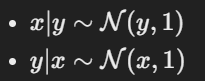

El siguiente codigo en Python muestra como podriamos implementar el muestreo de Gibbs para este escenario:

Media de x: 101.78, Desviación estándar de x: 108.88
Media de y: 101.79, Desviación estándar de y: 108.88


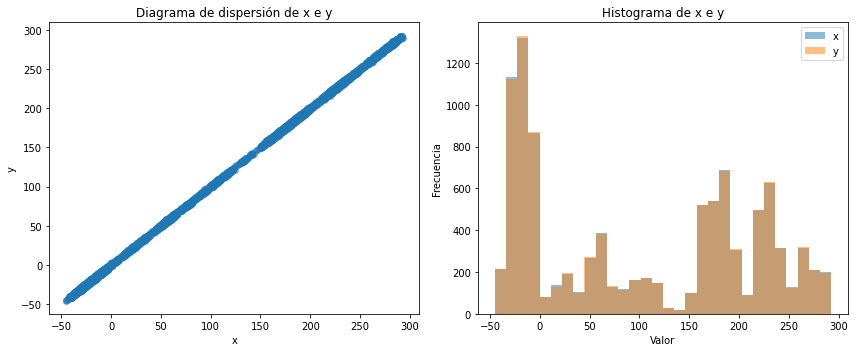

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def gibbs_sampling(iterations=1000):
    x, y = 0.0, 0.0  # Inicialización de x y y
    samples = []

    for _ in range(iterations):
        x = np.random.normal(y, 1)  # Muestreo x dado y
        y = np.random.normal(x, 1)  # Muestreo y dado x
        samples.append((x, y))

    return samples

# Ejecutar el muestreo de Gibbs
samples = gibbs_sampling(10000)  # Aumenté a 10,000 para mejor convergencia
samples_array = np.array(samples)

# Análisis de las muestras
x_samples = samples_array[:, 0]
y_samples = samples_array[:, 1]

# Calcular estadísticas básicas
x_mean, y_mean = np.mean(x_samples), np.mean(y_samples)
x_std, y_std = np.std(x_samples), np.std(y_samples)

# Mostrar estadísticas
print(f"Media de x: {x_mean:.2f}, Desviación estándar de x: {x_std:.2f}")
print(f"Media de y: {y_mean:.2f}, Desviación estándar de y: {y_std:.2f}")

# Crear visualizaciones
plt.figure(figsize=(12, 5))

# Diagrama de dispersión
plt.subplot(1, 2, 1)
plt.scatter(x_samples, y_samples, alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Diagrama de dispersión de x e y')

# Histogramas
plt.subplot(1, 2, 2)
plt.hist(x_samples, bins=30, alpha=0.5, label='x')
plt.hist(y_samples, bins=30, alpha=0.5, label='y')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma de x e y')
plt.legend()

plt.tight_layout()
plt.show()


El codigo realiza lo siguiente:

- Aumenta el numero de iteraciones a 10.000 para permitir una mejor convergencia.

- Calcula y muestra la media y la desviacion estandar de las muestras de x e y.

- Crea un diagrama de dispersion de las muestras, que puede ayudar a visalizar la relacion y la correlacion entre x e y.

- Genera histogramas para las muestras de x e y, que permiten observar la distribucion marginal de cada variable.